# Plot single interesting features for AO-acidification assay

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import easygui as eg
import seaborn as sns 
import matplotlib.pyplot as plt
import pycytominer

In [3]:
def plot_single_feat(df, x, y, color_col = 'Cells_CompoundSizeCnc', category_orders = [], category_col = '', title_plot='', hover_cols=[]):
    """ 
    
    """
    fig = px.box(df, x=x, y=y, points="all", title = y, 
            color = df[color_col],
            category_orders = {category_col: category_orders},
            hover_data=hover_cols
            )
    fig.update_xaxes(type="category")
    fig.update_layout(
        dict(updatemenus=[
                        dict(
                            type = "buttons",
                            direction = "left",
                            buttons=list([
                                dict(
                                    args=["visible", "legendonly"],
                                    label="Deselect All",
                                    method="restyle"
                                ),
                                dict(
                                    args=["visible", True],
                                    label="Select All",
                                    method="restyle"
                                )
                            ]),
                            pad={"r": 5, "t": 5},
                            showactive=True,
                            x=1,
                            xanchor="left",
                            y=1.1,
                            yanchor="top"
                        ),
                    ]
              ),
        font=dict(
        size=15),
        autosize=False,
        width=900,
        height=600,
        legend_title=color_col,
        title=title_plot,
        margin=dict(
            l=50,
            r=50,
            b=20,
            t=50,
            pad=4
        )
        )
    
    fig.show()
    return

In [4]:
# profile = eg.fileopenbox(msg="Choose a file with samples and their features", default=r"E:")
profile = r"C:\Users\fefos\OneDrive\FernandaDoc_HD\2022_09_09_LiveCellPainting_fossa_Cimini\workspace\profiles\2022_03_24_Acidification_AO\2022_03_24_Acidification_AO_normalized_negcon.csv"
print('Filename', profile)

Filename C:\Users\fefos\OneDrive\FernandaDoc_HD\2022_09_09_LiveCellPainting_fossa_Cimini\workspace\profiles\2022_03_24_Acidification_AO\2022_03_24_Acidification_AO_normalized_negcon.csv


In [5]:
#import
df = pd.read_csv(profile)

In [6]:
hover_list = ['Metadata_Plate', 'Metadata_Well', 'Metadata_Compound', 'Metadata_moa', 'Metadata_Time_hr']
categ_order = ['Non-treated 0.5 h', 'Bafilomycin A 0.5 h', 'Chloroquine 0.5 h','Non-treated 4.0 h', 'Bafilomycin A 4.0 h', 'Chloroquine 4.0 h']

In [7]:
df['Metadata_CompoundTime'] = df['Metadata_Compound'] + ' ' + df['Metadata_Time_hr'].astype(str) + ' h'

# Calculate the total = mean x count (vesicles)

In [8]:
df['Cells_Total_intensity'] = df['Metadata_cell_count'] * df['Cells_Mean_Vesicles_Intensity_IntegratedIntensity_AOPI']

# Remove NaN

In [9]:
df_nan = pycytominer.feature_select(df, operation = ['drop_na_columns']) 
print('How many columns were dropped?', df.shape[1] - df_nan.shape[1])

How many columns were dropped? 56


# Apply pycombat

In [10]:
import sys
sys.path.append(r"C:\Users\fefos\Documents\GitHub\2022_09_09_LiveCellPainting_fossa_Cimini")
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

from scripts_notebooks_fossa.pycombat_umap import combat_util

In [12]:
df_plates = combat_util.pycombat_generator(df_nan, batch_column = 'Metadata_Plate', well_column='Metadata_Well')
df_plates['Metadata_CompoundTime'] = df['Metadata_CompoundTime']

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


# Distribution of vesicles

In [13]:
categ_order = ['Non-treated 0.5 h', 'Bafilomycin A 0.5 h', 'Chloroquine 0.5 h','Non-treated 4.0 h', 'Bafilomycin A 4.0 h', 'Chloroquine 4.0 h']

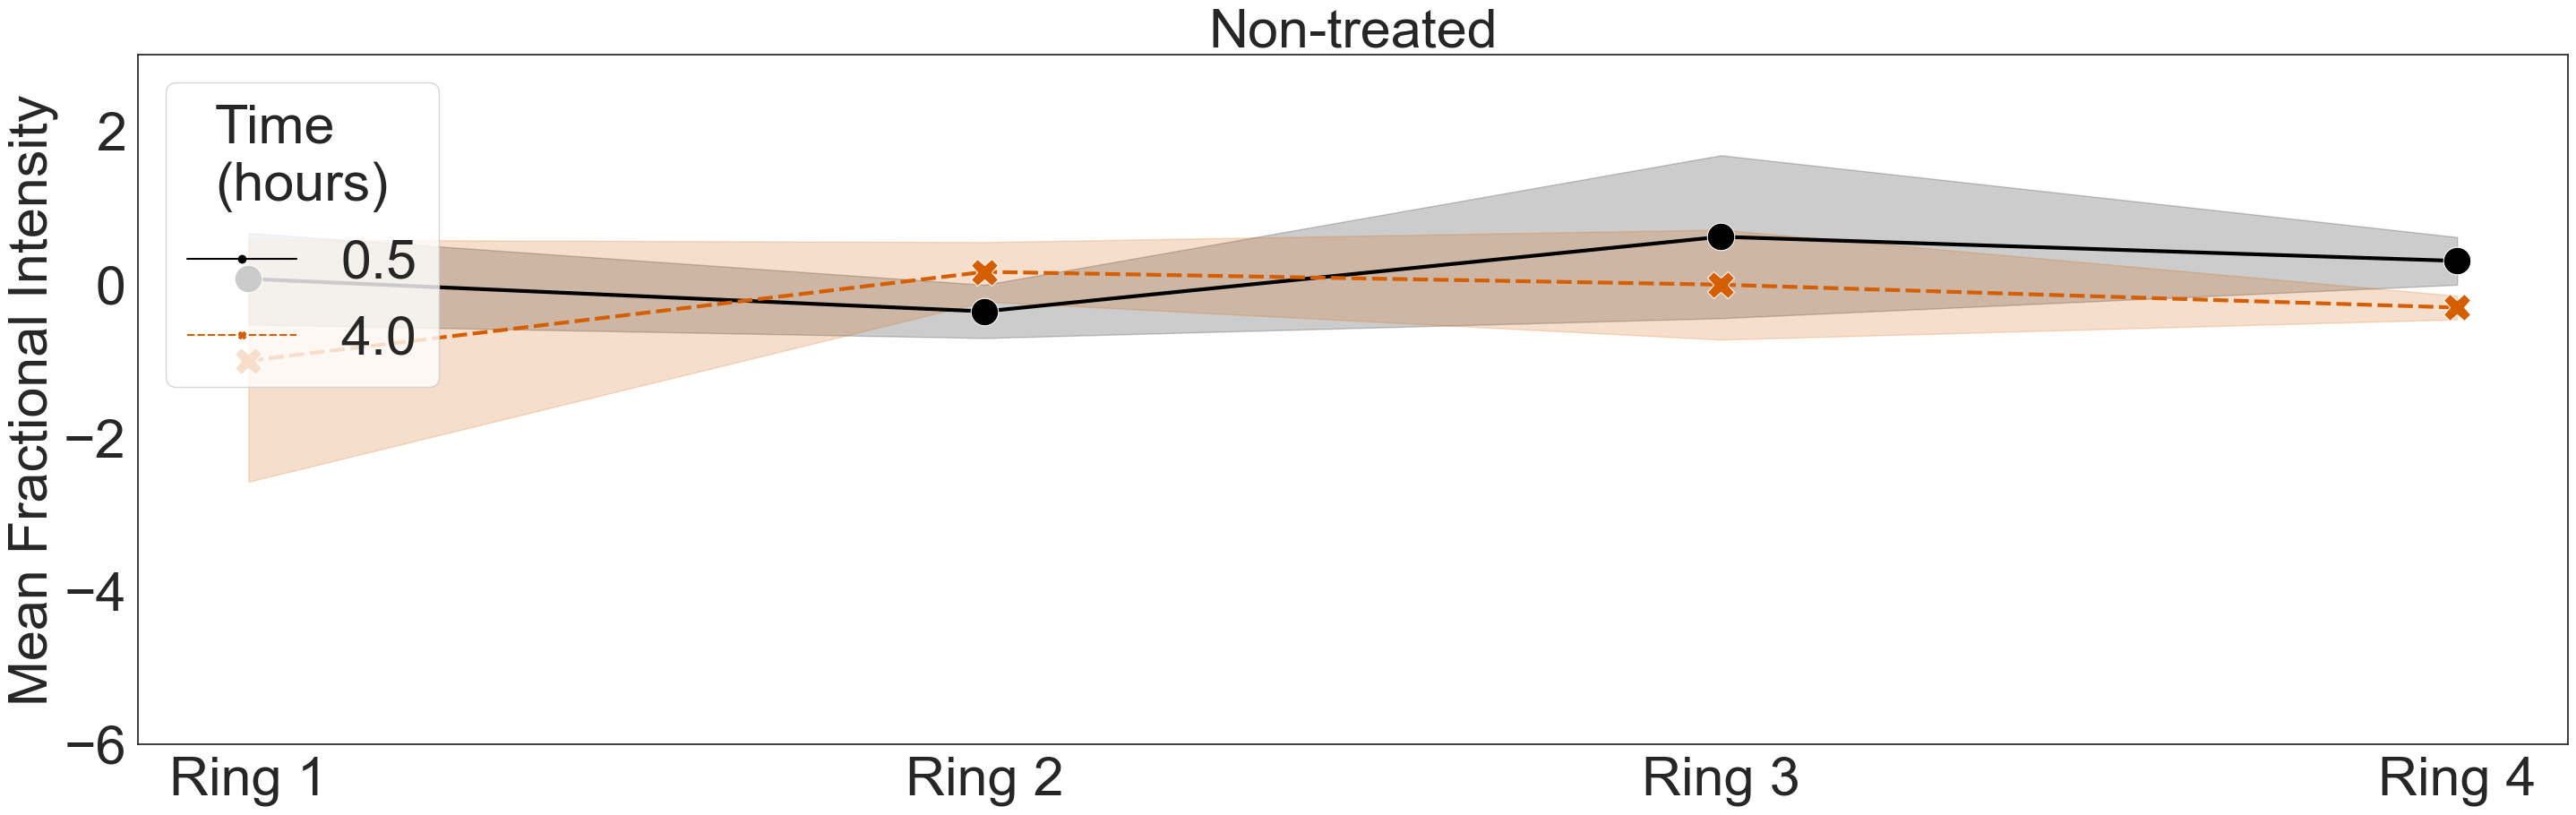

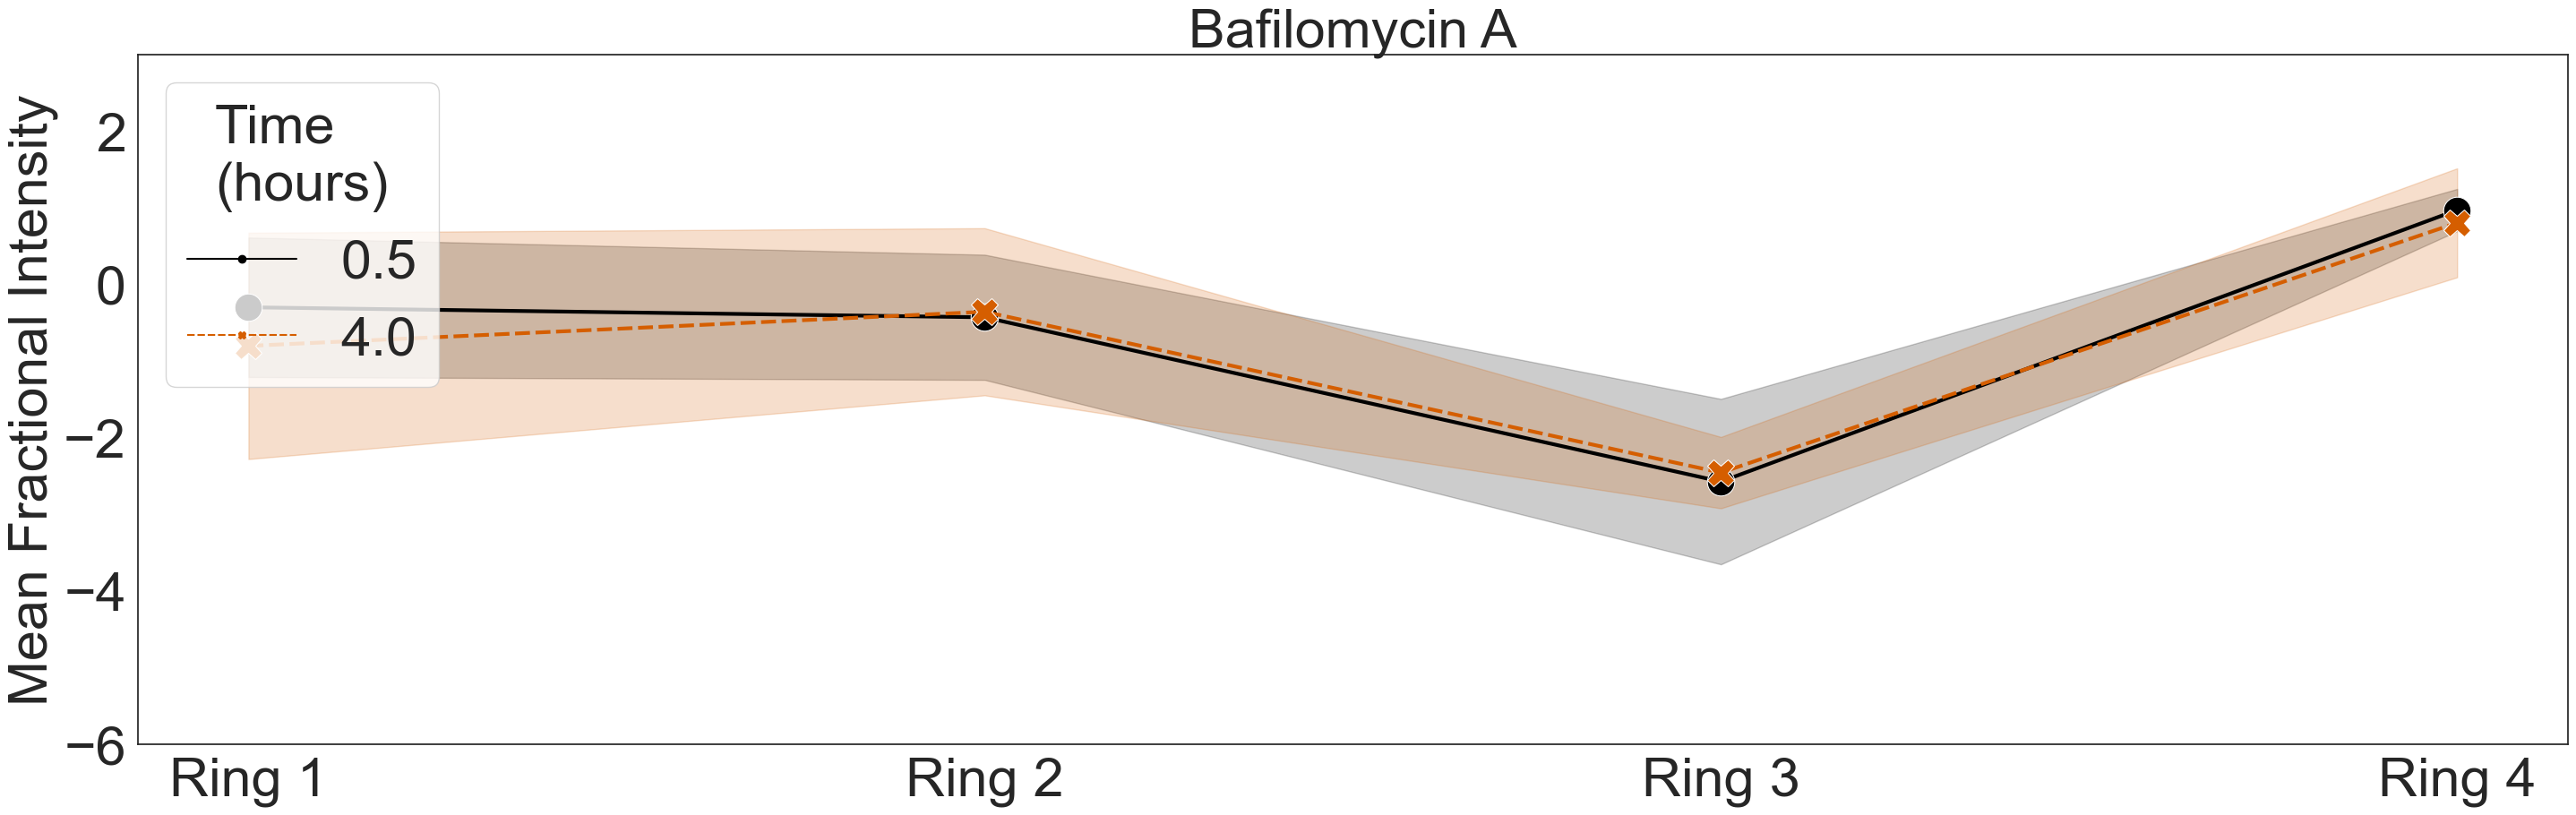

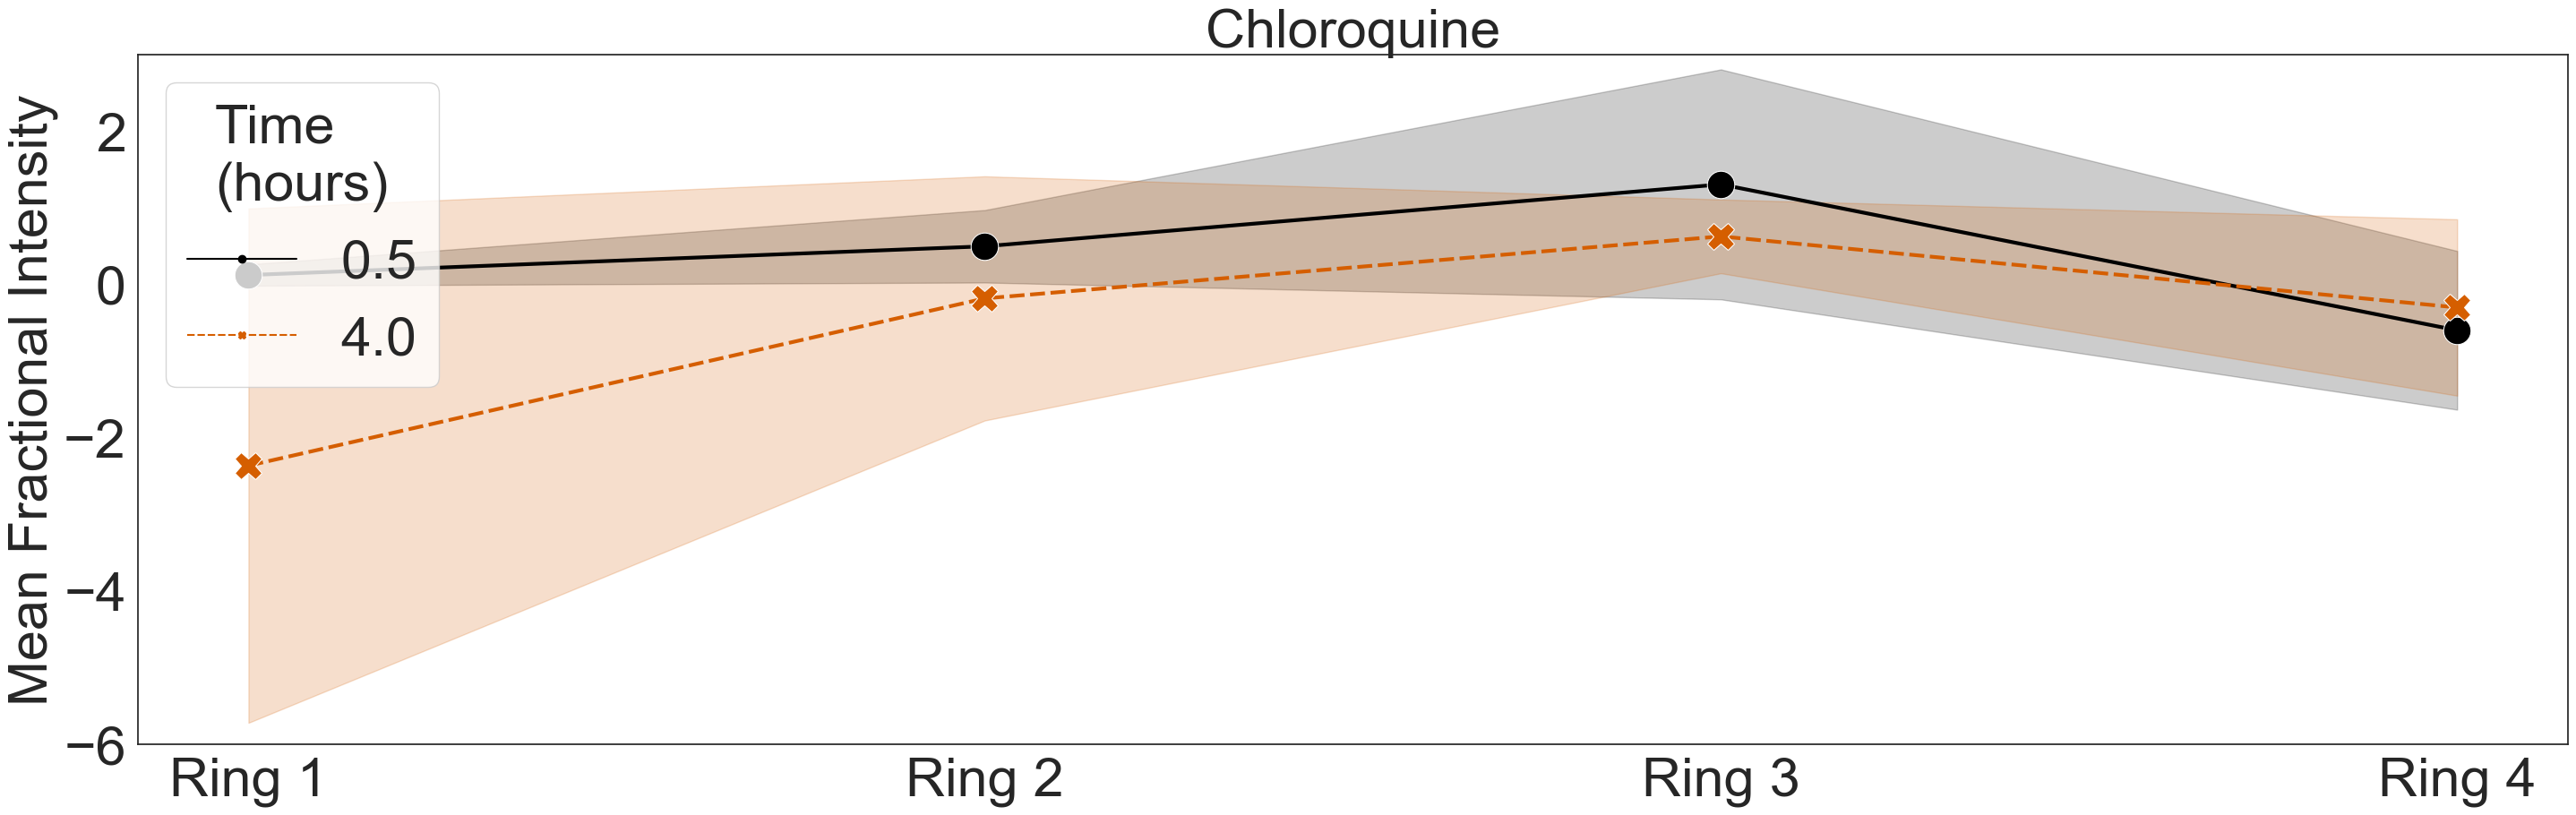

In [16]:
size_font = 44

# Define the color palette
color_palette = ['#000000', '#D55E00']  # Adjusted to two colors
slice_lst = ["Non-treated", "Bafilomycin A", "Chloroquine"]

for x in range(len(slice_lst)):
    df_sliced = annotated.query(f"'{slice_lst[x]}' in Metadata_Compound").reset_index(drop=True)
    sns.set_style(style='white')
    fig, ax = plt.subplots(figsize=(35, 10))

    g = sns.lineplot(
        x='feature', 
        y='value', 
        hue='Metadata_Time_hr',  # Use Metadata_Time_hr for coloring
        style='Metadata_Time_hr',  # Use Metadata_Time_hr for line style
        data=df_sliced, 
        palette=color_palette, 
        markers=True,  # Add markers for each data point
        markersize=22,  # Adjust marker size
        linewidth=3.0,  # Adjust line width
        ax=ax
    )

    # Move the legend to the upper left and adjust the font size
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    legend = plt.legend(fontsize=size_font, loc='upper left')  #, bbox_to_anchor=(1, 1)
    
    # Set the title of the legend
    legend.set_title("Time \n(hours)", prop={'size': size_font})

    # Modify the labels in the legend
    labels = [text.get_text() for text in legend.get_texts()]
    new_labels = [label for label in labels]
    for text, new_label in zip(legend.get_texts(), new_labels):
        text.set_text(new_label)
        text.set_fontsize(size_font)  # Set the font size of the legend text

    ax.set_title(f"{slice_lst[x]}", fontsize=size_font)     
    ax.set_ylim(-6, 3)
    ax.tick_params(labelsize=size_font)
    ax.set_xlabel(None)
    ax.set_ylabel('Mean Fractional Intensity', fontsize=size_font)
    ax.figure.savefig(f"Distribution_vesicles_{slice_lst[x]}.svg")
    plt.show()


## Cells_Total_intensity

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-treated 0.5 h vs. Bafilomycin A 0.5 h: t-test independent samples, P_val:9.405e-03 t=3.397e+00
Non-treated 4.0 h vs. Bafilomycin A 4.0 h: t-test independent samples, P_val:3.234e-04 t=6.000e+00
Non-treated 0.5 h vs. Chloroquine 0.5 h: t-test independent samples, P_val:1.347e-03 t=-4.805e+00


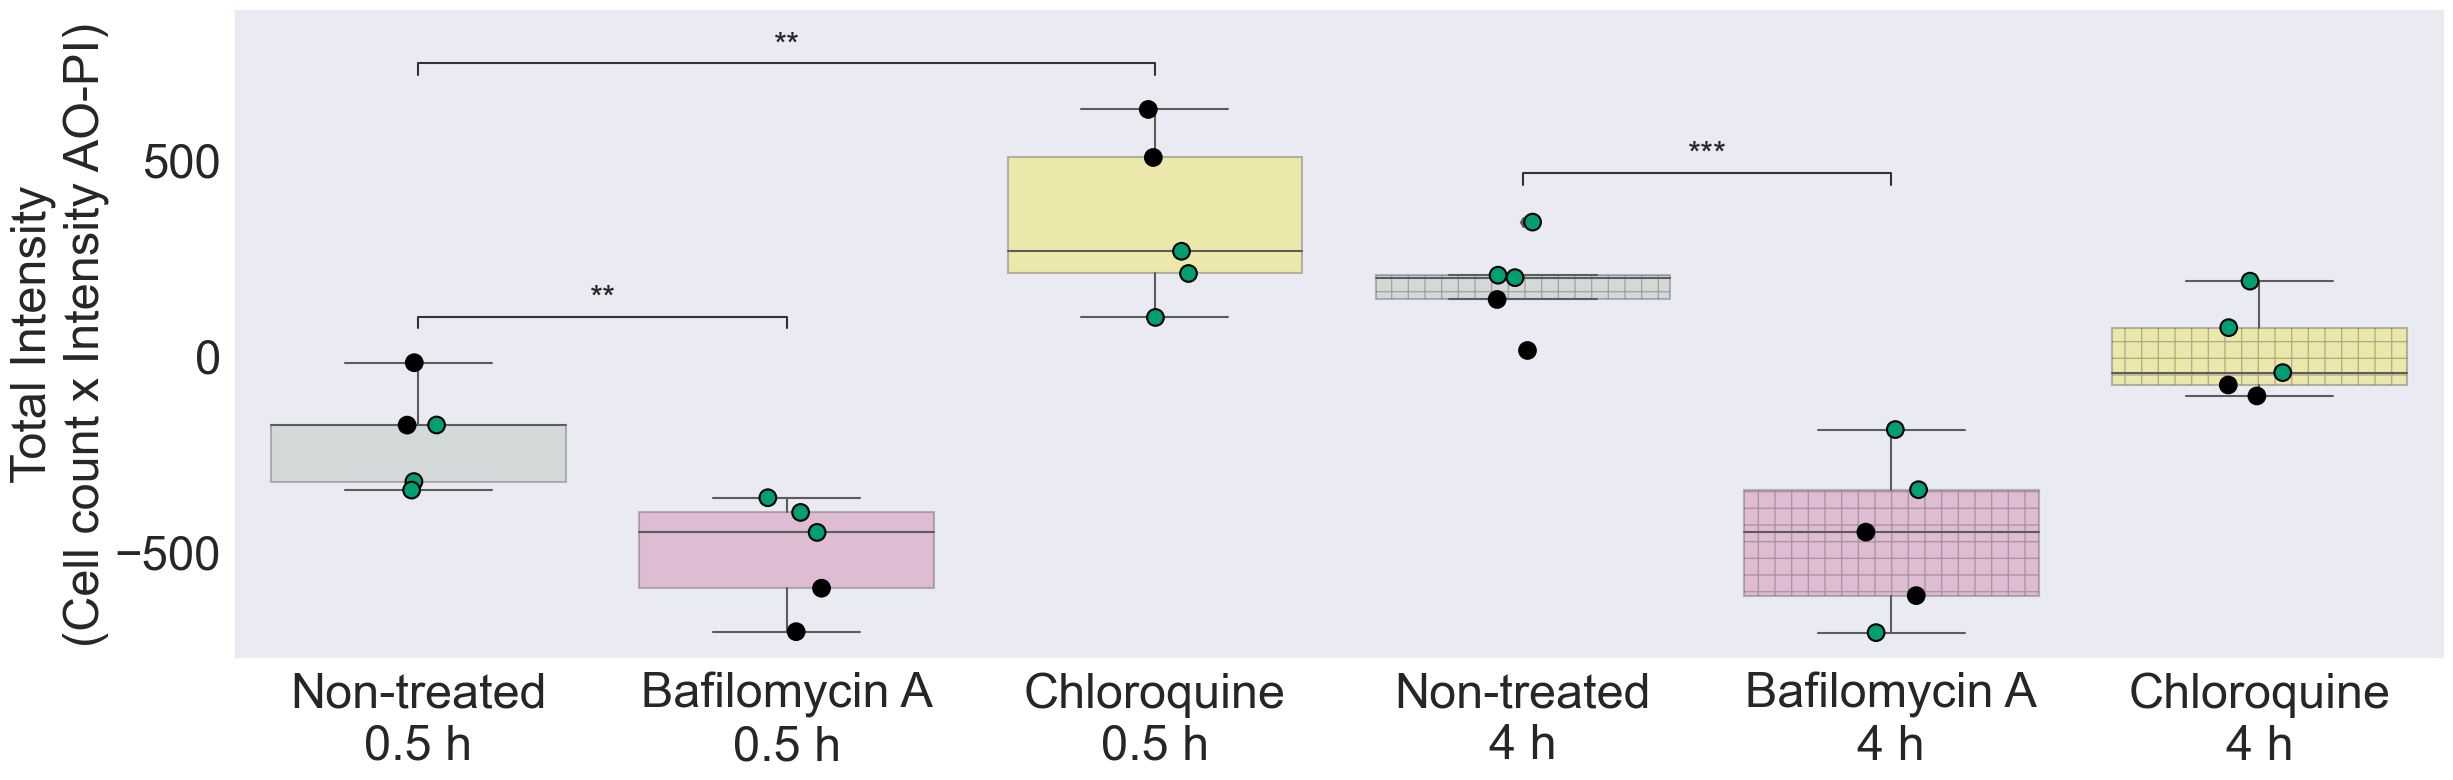

In [17]:
from statannotations.Annotator import Annotator

size_font=35

pairs = [("Non-treated 0.5 h", "Bafilomycin A 0.5 h"), 
         ("Non-treated 0.5 h", "Chloroquine 0.5 h"),
         ("Non-treated 4.0 h", "Bafilomycin A 4.0 h"), 
        #  ("Non-treated 4.0 h", "Chloroquine 4.0 h")
         ]
feature = 'Cells_Total_intensity'
new_col = 'Metadata_CompoundTime'
colors = ['#b2beB5', '#CC79A7', '#F0E442']
# colors = ['#b2beB5', '#F72585', '#3A0CA3']

df_to_plot = df_plates.copy()
sns.set(font_scale=2)
sns.set_style("dark")
g = sns.catplot(x=new_col,
                    y=feature,
                    # hue="Metadata_Time_hr",
                    # col="PMMA",
                    kind="box",
                    legend=False,
                    height=8,
                    aspect=3,
                    palette=colors,
                    # linewidth=2.5,
                    boxprops={'alpha': 0.4},
                    data=df_to_plot,
                    order=categ_order,
                    saturation=1)
g.map_dataframe(sns.stripplot,
                x=new_col,
                y=feature,
                hue='Metadata_Plate',
                jitter=0.1,
                dodge=False,
                marker='o',
                linewidth=1.5,
                # palette="Paired",
                palette=["#000000", "#009E73"],
                # alpha=0.5,
                order=categ_order,
                size=12,
                )
# Define some hatches
hatches = ['', '', '', '+', '+', '+']

# Loop over the bars
for i,thisbar in enumerate(g.ax.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])



# g.add_legend(title='Plate')
g.set(xlabel=None, ylabel="Total Intensity\n(Cell count x Intensity AO-PI)")

annot = Annotator(g.ax, [("Non-treated 0.5 h", "Bafilomycin A 0.5 h"), ("Non-treated 0.5 h", "Chloroquine 0.5 h"), ("Non-treated 4.0 h", "Bafilomycin A 4.0 h"), ("Non-treated 4.0 h", "Chloroquine 4.0 h")], 
                  data=df_to_plot, x=new_col, y=feature, order=categ_order)
annot.reset_configuration()
annot.new_plot(g.ax, pairs, data=df_to_plot, x=new_col, y=feature)
annot.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2).apply_test().annotate()


# Define new x-tick labels
new_xtick_labels = ["Non-treated\n0.5 h", "Bafilomycin A\n0.5 h", "Chloroquine\n0.5 h", "Non-treated\n4 h", "Bafilomycin A\n4 h", "Chloroquine\n4 h"]

# Set new x-tick labels
g.ax.set_xticklabels(new_xtick_labels, rotation=0, fontsize=size_font)
g.ax.tick_params(axis='y', labelsize=34)
g.ax.set_ylabel("Total Intensity\n(Cell count x Intensity AO-PI)", fontsize=size_font)


# plt.xticks(rotation=60)
plt.show()
g.savefig(f"{feature}.svg")

## Cytoplasm_Intensity_MeanIntensity_AOPI

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-treated 0.5 h vs. Bafilomycin A 0.5 h: t-test independent samples, P_val:1.377e-03 t=4.788e+00
Non-treated 0.5 h vs. Chloroquine 0.5 h: t-test independent samples, P_val:1.563e-02 t=-3.058e+00


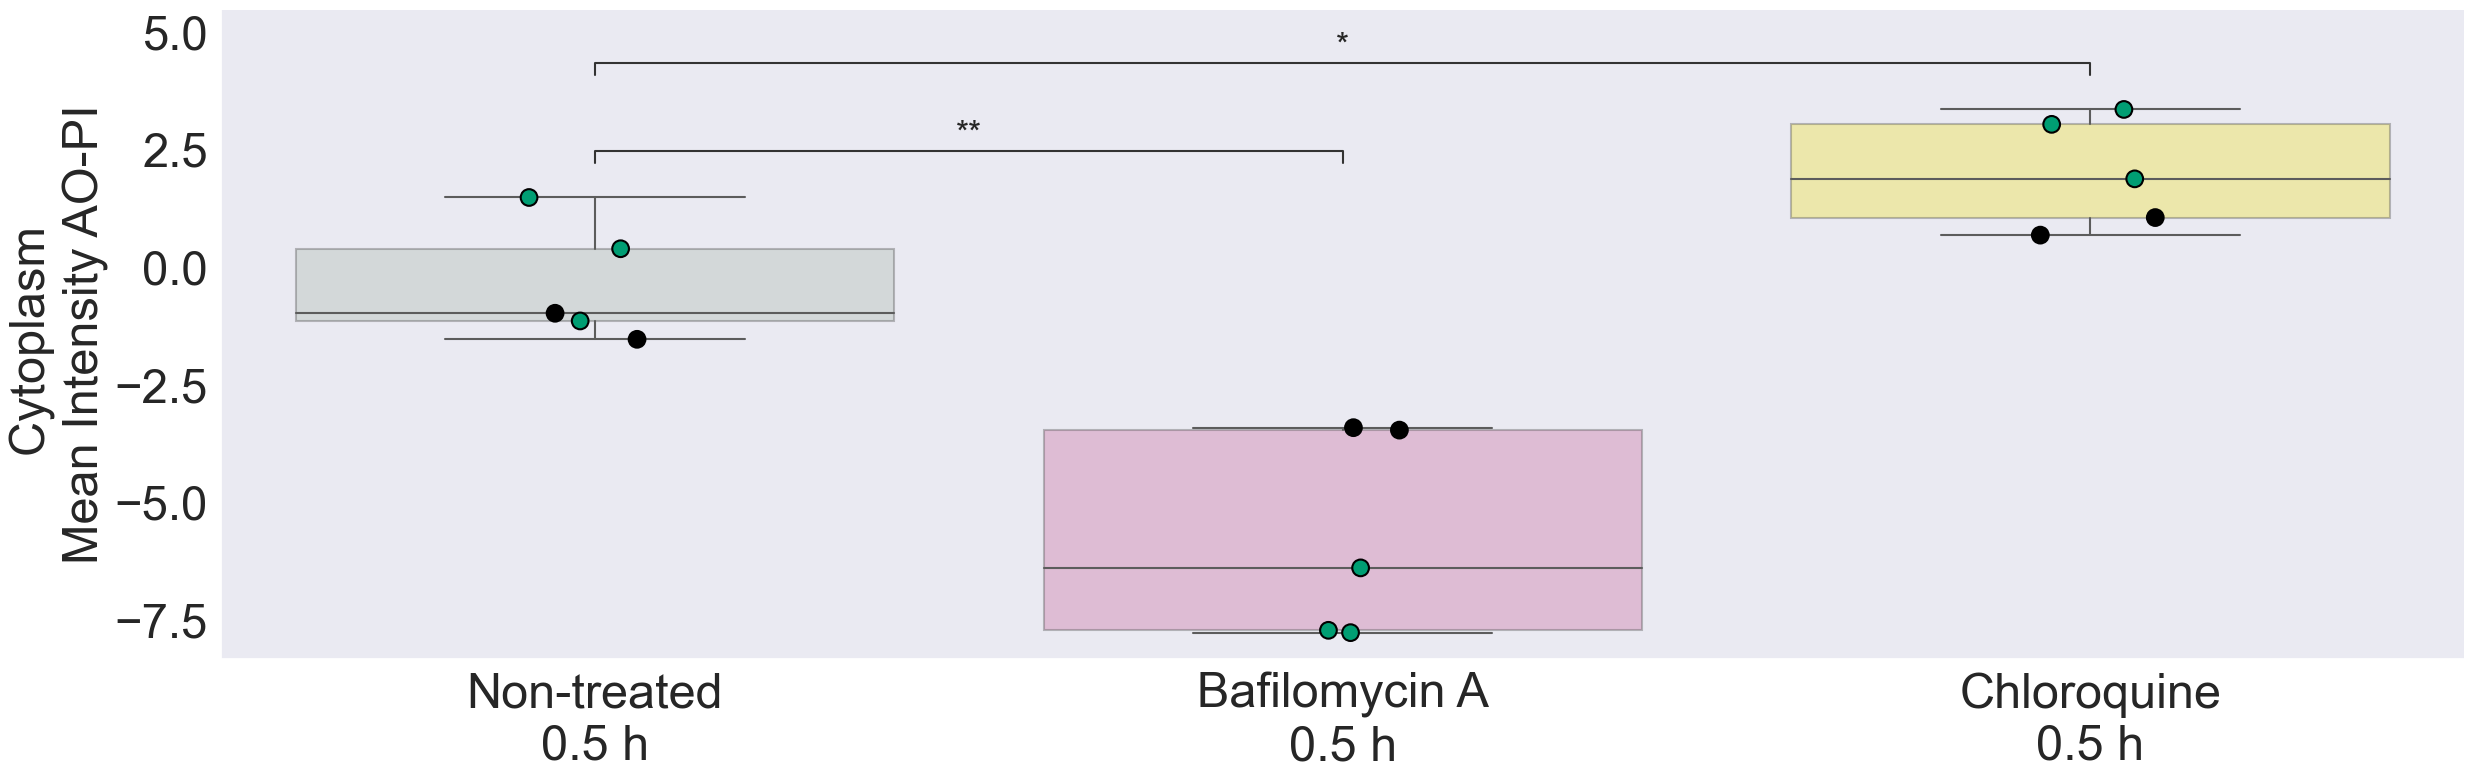

In [17]:
from statannotations.Annotator import Annotator

categ_order = ['Non-treated 0.5 h', 'Bafilomycin A 0.5 h', 'Chloroquine 0.5 h']

size_font = 35

pairs_0_5h = [
    ("Non-treated 0.5 h", "Bafilomycin A 0.5 h"), 
    ("Non-treated 0.5 h", "Chloroquine 0.5 h")
]

feature = 'Cytoplasm_Intensity_MeanIntensity_AOPI'
new_col = 'Metadata_CompoundTime'
colors = ['#b2beB5', '#CC79A7', '#F0E442']

df_to_plot_0_5h = df_plates[df_plates['Metadata_Time_hr'] == 0.5].reset_index(drop=True)
# df_to_plot_0_5h = df_plates.query(f"0.5 in Metadata_Time_hr").reset_index(drop=True)

sns.set(font_scale=2)
sns.set_style("dark")
g_0_5h = sns.catplot(
    x=new_col,
    y=feature,
    kind="box",
    legend=False,
    height=8,
    aspect=3,
    palette=colors,
    boxprops={'alpha': 0.4},
    data=df_to_plot_0_5h,
    order=categ_order,
    saturation=1
)

g_0_5h.map_dataframe(
    sns.stripplot,
    x=new_col,
    y=feature,
    hue='Metadata_Plate',
    jitter=0.1,
    dodge=False,
    marker='o',
    linewidth=1.5,
    palette=["#000000", "#009E73"],
    order=categ_order,
    size=12
)

hatches = ['', '', '', '+', '+', '+']

for i, thisbar in enumerate(g_0_5h.ax.patches):
    thisbar.set_hatch(hatches[i])

g_0_5h.set(xlabel=None, ylabel="Total Intensity\n(Cell count x Intensity AO-PI)")

annot_0_5h = Annotator(
    g_0_5h.ax,
    pairs_0_5h, 
    data=df_to_plot_0_5h, 
    x=new_col, 
    y=feature, 
    order=categ_order
)
annot_0_5h.reset_configuration()
annot_0_5h.new_plot(g_0_5h.ax, pairs_0_5h, data=df_to_plot_0_5h, x=new_col, y=feature)
annot_0_5h.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2).apply_test().annotate()

new_xtick_labels = ["Non-treated\n0.5 h", "Bafilomycin A\n0.5 h", "Chloroquine\n0.5 h"]
g_0_5h.ax.set_xticklabels(new_xtick_labels, rotation=0, fontsize=size_font)
g_0_5h.ax.tick_params(axis='y', labelsize=34)
g_0_5h.ax.set_ylabel("Cytoplasm \nMean Intensity AO-PI", fontsize=size_font)

plt.show()
g_0_5h.savefig(f"Int_0.5h.svg")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-treated 4.0 h vs. Bafilomycin A 4.0 h: t-test independent samples, P_val:3.682e-04 t=5.884e+00
Non-treated 4.0 h vs. Chloroquine 4.0 h: t-test independent samples, P_val:7.665e-01 t=3.073e-01


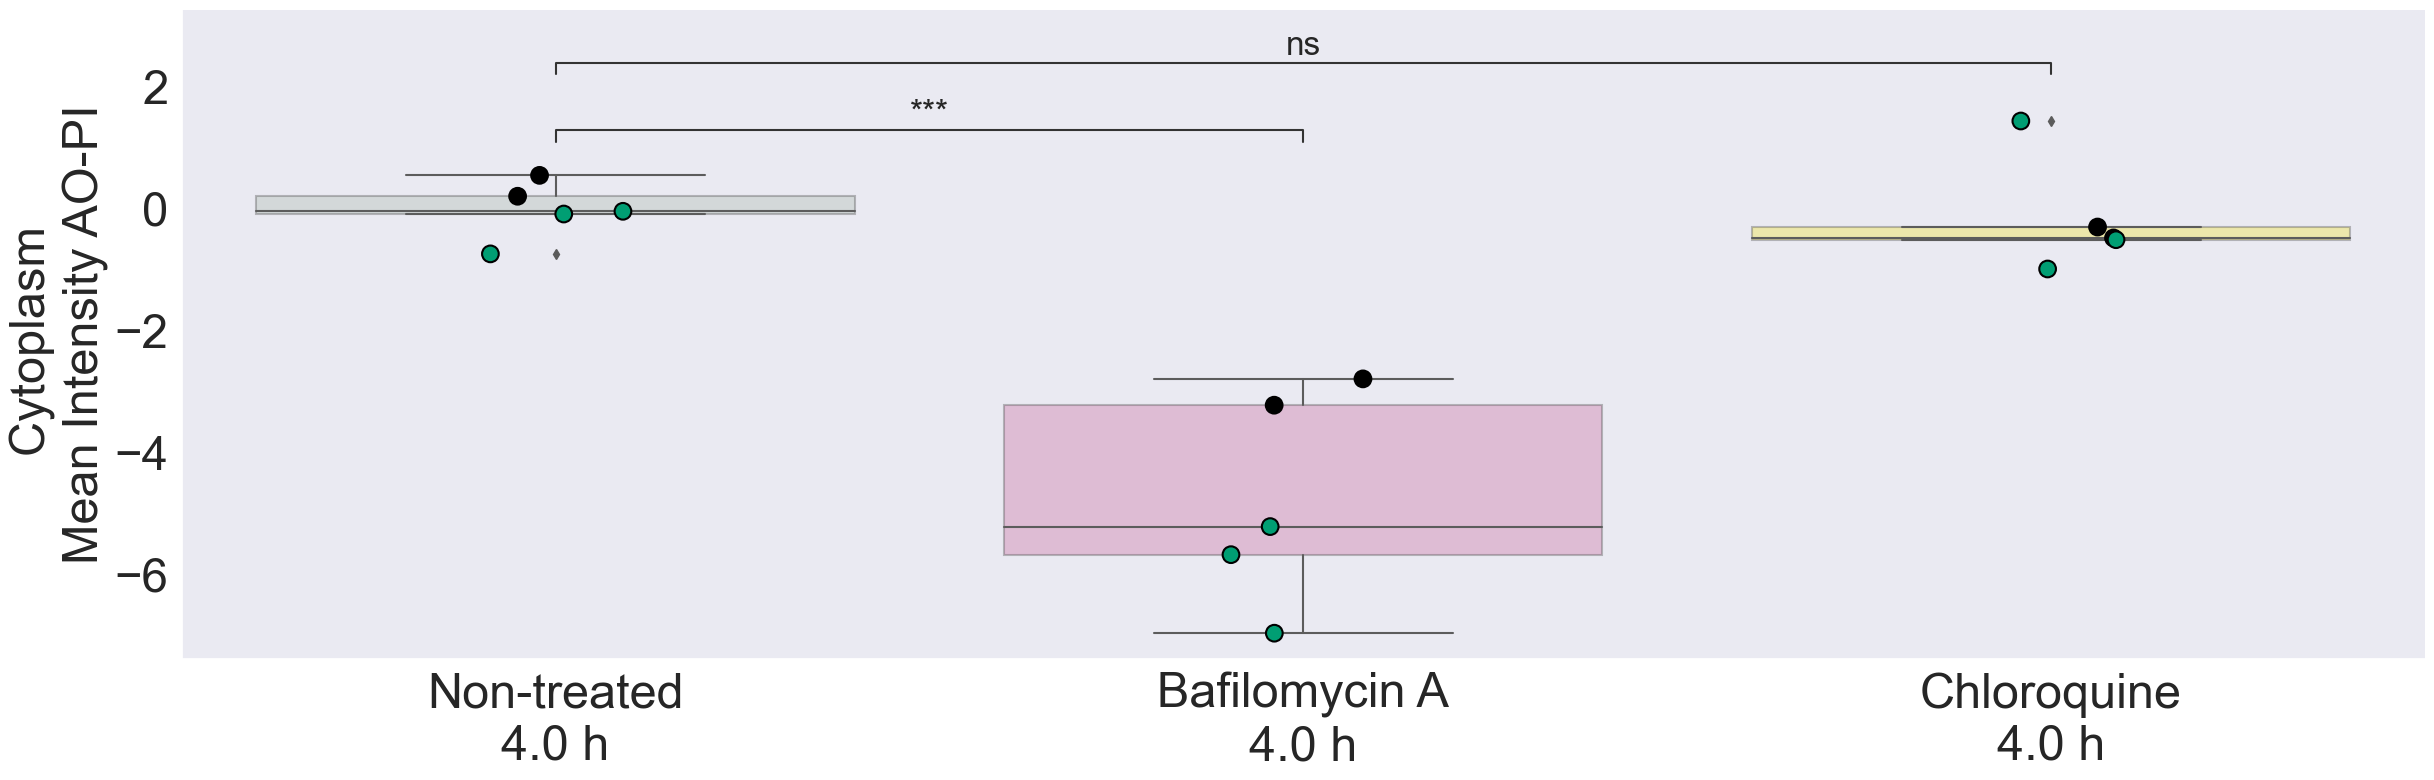

In [18]:
from statannotations.Annotator import Annotator

categ_order = ['Non-treated 4.0 h', 'Bafilomycin A 4.0 h', 'Chloroquine 4.0 h']

size_font = 35

pairs_4_0h = [
    ("Non-treated 4.0 h", "Bafilomycin A 4.0 h"), 
    ("Non-treated 4.0 h", "Chloroquine 4.0 h")
]

feature = 'Cytoplasm_Intensity_MeanIntensity_AOPI'
new_col = 'Metadata_CompoundTime'
colors = ['#b2beB5', '#CC79A7', '#F0E442']

df_to_plot_4_0h = df_plates[df_plates['Metadata_Time_hr'] == 4.0].reset_index(drop=True)
# df_to_plot_4_0h = df_plates.query(f"4.0 in Metadata_Time_hr").reset_index(drop=True)

sns.set(font_scale=2)
sns.set_style("dark")
g_4_0h = sns.catplot(
    x=new_col,
    y=feature,
    kind="box",
    legend=False,
    height=8,
    aspect=3,
    palette=colors,
    boxprops={'alpha': 0.4},
    data=df_to_plot_4_0h,
    order=categ_order,
    saturation=1
)

g_4_0h.map_dataframe(
    sns.stripplot,
    x=new_col,
    y=feature,
    hue='Metadata_Plate',
    jitter=0.1,
    dodge=False,
    marker='o',
    linewidth=1.5,
    palette=["#000000", "#009E73"],
    order=categ_order,
    size=12
)

hatches = ['', '', '', '+', '+', '+']

for i, thisbar in enumerate(g_4_0h.ax.patches):
    thisbar.set_hatch(hatches[i])

g_4_0h.set(xlabel=None, ylabel="Total Intensity\n(Cell count x Intensity AO-PI)")

annot_4_0h = Annotator(
    g_4_0h.ax,
    pairs_4_0h, 
    data=df_to_plot_4_0h, 
    x=new_col, 
    y=feature, 
    order=categ_order
)
annot_4_0h.reset_configuration()
annot_4_0h.new_plot(g_4_0h.ax, pairs_4_0h, data=df_to_plot_4_0h, x=new_col, y=feature)
annot_4_0h.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2).apply_test().annotate()

new_xtick_labels = ["Non-treated\n4.0 h", "Bafilomycin A\n4.0 h", "Chloroquine\n4.0 h"]
g_4_0h.ax.set_xticklabels(new_xtick_labels, rotation=0, fontsize=size_font)
g_4_0h.ax.tick_params(axis='y', labelsize=34)
g_4_0h.ax.set_ylabel("Cytoplasm \nMean Intensity AO-PI", fontsize=size_font)

plt.show()
g_4_0h.savefig(f"Int_4.0h.svg")
